**Spam SMS Detection**

In [3]:
import  numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv('spam (2).csv',encoding='latin-1',low_memory=False)

In [75]:
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [76]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  12 non-null     object
dtypes: object(3)
memory usage: 130.7+ KB


In [11]:
df.shape

(5572, 3)

In [14]:
print(df.isnull().sum())

v1               0
v2               0
Unnamed: 2    5560
dtype: int64


Data Types:
 label       int32
message    object
dtype: object


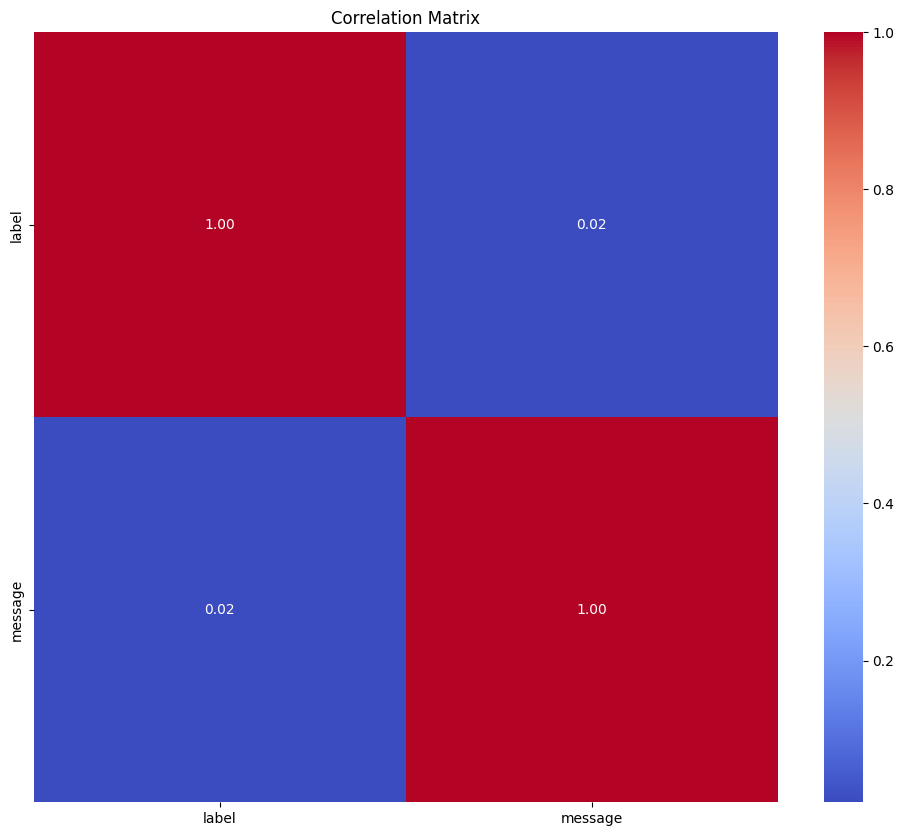

In [103]:

from sklearn.preprocessing import LabelEncoder
print("Data Types:\n", df.dtypes)

# Converting categorical columns to numeric using Label Encoding
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


First few rows of the dataset:
   label  message
0      0     1079
1      0     3101
2      1     1000
3      0     4088
4      0     2757

Distribution of labels:
label
0    4825
1     747
Name: count, dtype: int64


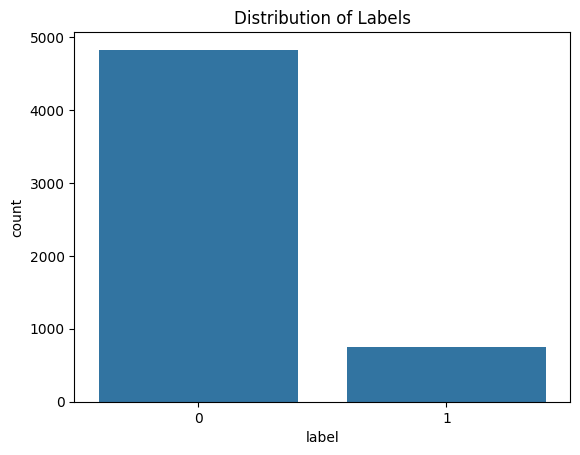

In [107]:
# Displayinging the first few rows
print("First few rows of the dataset:")
print(df.head())

# Checking the distribution of the labels
print("\nDistribution of labels:")
print(df['label'].value_counts())

# Visualizing the distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

In [18]:

print("Basic Statistics of the dataset:")
print(df.describe())

# Displaying basic statistics grouped by label
print("\nBasic Statistics grouped by label:")
print(df.groupby('label').describe())

Basic Statistics of the dataset:
             label
count  5572.000000
mean      0.134063
std       0.340751
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

Basic Statistics grouped by label:
      message                                                               
        count unique                                                top freq
label                                                                       
0        4825   4516                             Sorry, I'll call later   30
1         747    653  Please call our customer service representativ...    4


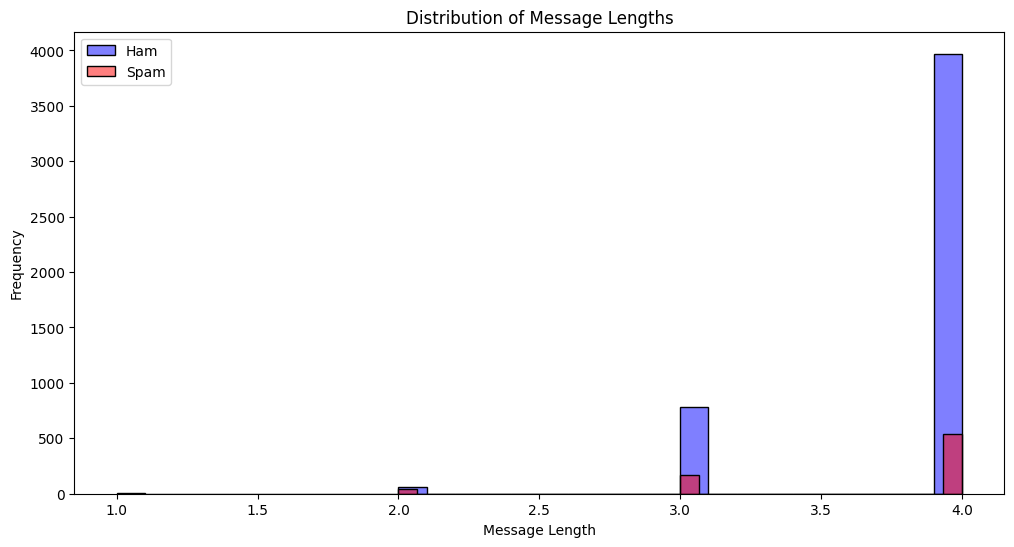

In [111]:
import seaborn as sns

# Add a column for message length
df['length'] = df['message'].apply(len)

# Plot the distribution of message lengths
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['length'], bins=30, color='blue', label='Ham', alpha=0.5)
sns.histplot(df[df['label'] == 1]['length'], bins=30, color='red', label='Spam', alpha=0.5)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()



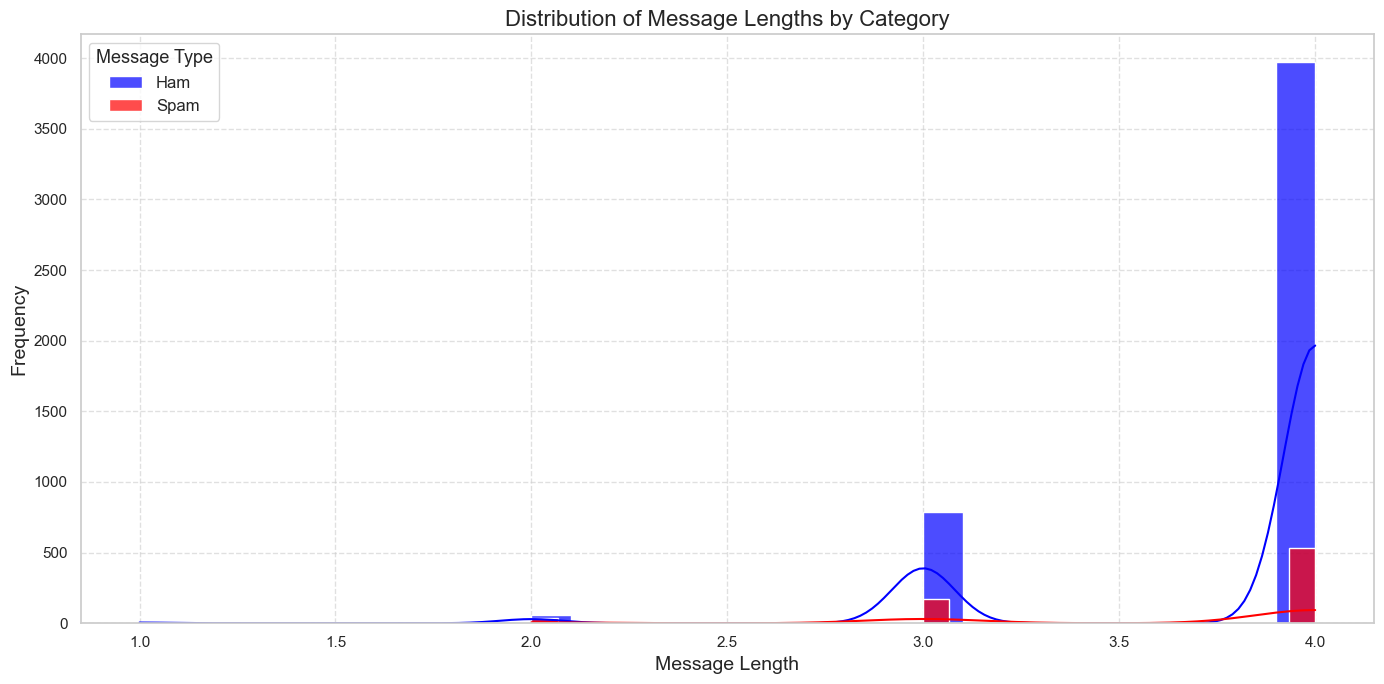

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
df['length'] = df['message'].apply(len)
sns.set(style='whitegrid')
plt.figure(figsize=(14, 7))
sns.histplot(df[df['label'] == 0]['length'], bins=30, color='blue', label='Ham', alpha=0.7, kde=True)
sns.histplot(df[df['label'] == 1]['length'], bins=30, color='red', label='Spam', alpha=0.7, kde=True)

plt.title('Distribution of Message Lengths by Category', fontsize=16)
plt.xlabel('Message Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Message Type', title_fontsize='13', fontsize='12')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Data pre-processing**

In [27]:
# Map labels to numerical values
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Check the first few rows after preprocessing
print("\nDataset after preprocessing:")
print(df.head())



Dataset after preprocessing:
   label                                            message  message_length
0    NaN  Go until jurong point, crazy.. Available only ...             111
1    NaN                      Ok lar... Joking wif u oni...              29
2    NaN  Free entry in 2 a wkly comp to win FA Cup fina...             155
3    NaN  U dun say so early hor... U c already then say...              49
4    NaN  Nah I don't think he goes to usf, he lives aro...              61


In [81]:
# Drop unnecessary columns
df= df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# Rename columns for easier access
df.columns = ['label', 'message']

# Encode labels (ham = 0, spam = 1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Display the first few rows of the preprocessed data
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


**Train-Test Split**

In [82]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing data split completed.")



Training and testing data split completed.


**Feature scaling**

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_transformed = vectorizer.fit_transform(X_train)

X_test_transformed = vectorizer.transform(X_test)

print("\nFeature scaling (text vectorization) completed.")



Feature scaling (text vectorization) completed.


In [84]:
print(y_train.isnull().sum())


0


**Model Training and Evalution**

**1. Support Vector Machine (SVM)**

In [86]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

svm_model.fit(X_train_transformed, y_train)

y_pred_svm = svm_model.predict(X_test_transformed)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm * 100:.2f}%')
print('\nSVM Classification Report:')
print(classification_report(y_test, y_pred_svm))
print('\nSVM Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 97.94%

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115


SVM Confusion Matrix:
[[961   4]
 [ 19 131]]


**2. Logistic Regression**

In [87]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train_transformed, y_train)

y_pred_logistic = logistic_model.predict(X_test_transformed)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic * 100:.2f}%')
print('\nLogistic Regression Classification Report:')
print(classification_report(y_test, y_pred_logistic))
print('\nLogistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression Accuracy: 97.76%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.84      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


Logistic Regression Confusion Matrix:
[[964   1]
 [ 24 126]]


**3. Random Forest**

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



# Fit the model
rf_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_transformed)


# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))
print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 97.58%

Random Forest Classification Report:
Random Forest Accuracy: 97.58%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115


Random Forest Confusion Matrix:
[[965   0]
 [ 27 123]]


**4. K-Nearest Neighbors (KNN)**

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train_transformed, y_train)

y_pred_knn = knn_model.predict(X_test_transformed)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn * 100:.2f}%')
print('\nKNN Classification Report:')
print(classification_report(y_test, y_pred_knn))
print('\nKNN Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 91.93%

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96       965
           1       1.00      0.40      0.57       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115


KNN Confusion Matrix:
[[965   0]
 [ 90  60]]


**ROC Curve**

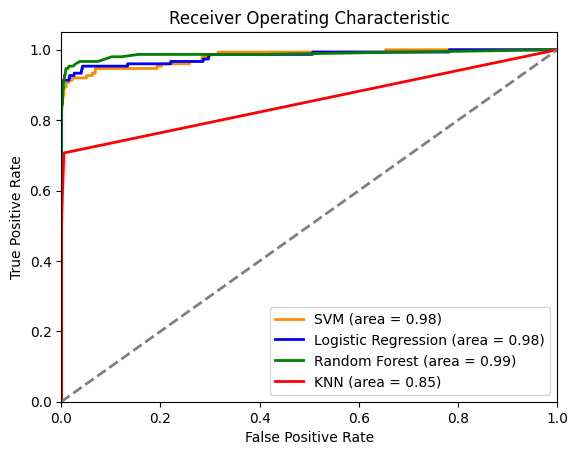

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_prob_svm = svm_model.decision_function(X_test_transformed)  # For SVM
y_prob_logistic = logistic_model.predict_proba(X_test_transformed)[:, 1]  # For Logistic Regression
y_prob_rf = rf_model.predict_proba(X_test_transformed)[:, 1]  # For Random Forest
y_prob_knn = knn_model.predict_proba(X_test_transformed)[:, 1]  # For KNN

# Computing ROC curve and ROC area for each model
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting ROC curves
plt.figure()

plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (area = {roc_auc_svm:.2f})')
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistic Regression (area = {roc_auc_logistic:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (area = {roc_auc_knn:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

plt.show()


**TEST for a New Message**

In [96]:
new_message = ["Congratulations! You've won a free ticket to the Bahamas!"]
new_message_tfidf = vectorizer.transform(new_message)
# Predicting with the SVM model
prediction_svm = svm_model.predict(new_message_tfidf)
print('SVM Prediction:', 'Ham' if prediction_svm[0] else 'Spam')


SVM Prediction: Spam


In [97]:
new_message = ["Congratulations! You've won a free ticket to the Bahamas!"]
new_message_tfidf = vectorizer.transform(new_message)
# Predicting with the Random Forest model
prediction_rf = rf_model.predict(new_message_tfidf)
print('Random Forest Prediction:', 'Ham' if prediction_rf[0] else 'Spam')



Random Forest Prediction: Spam
